$$\xi_1 \sim \mathcal{N}(a_1, \varphi_1^2), \quad \eta_1 \sim \mathcal{N}(b_1, \psi_1^2)$$
$$\xi_2 \sim \mathcal{N}(a_2, \varphi_2^2), \quad \eta_2 \sim \mathcal{N}(b_2, \psi_2^2)$$

$$H_0: \varphi_1^2 = \psi_1^2, \quad \varphi_2^2 = \psi_2^2$$

$$H_1: \varphi_1^2 \neq \psi_1^2 \quad \text{или} \quad \varphi_2^2 \neq \psi_2^2$$


In [43]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import f

l_sigma1 = 5.722
l_sigma2 = 6.161
w_sigma1 = 4.612
w_sigma2 = 5.055

ancient_skulls = 139
europe_skulls = 1000

F_length = (l_sigma1 ** 2) / (l_sigma2 ** 2)
F_width = (w_sigma1 ** 2) / (w_sigma2 ** 2)

alpha = 0.05
n1, n2 = ancient_skulls - 1, europe_skulls - 1 #Степени свободы
quantile_2_5 = f.ppf(alpha / 2, n1, n2) #Нижний квантиль
quantile_97_5 = f.ppf(1 - alpha / 2, n1, n2) #Верхний квантиль

print(f"F (длина): {F_length:.3f}")
print(f"F (ширина): {F_width:.3f}")
print(f"Верхние и нижние квантили для F: [{quantile_2_5:.3f}, {quantile_97_5:.3f}]")

F (длина): 0.863
F (ширина): 0.832
Верхние и нижние квантили для F: [0.767, 1.272]


### F как для длины, так и для ширины попадают в интервал, значит дисперсии не отличаются 

In [44]:
#Вычисляем p-value для длины и ширины

p_value_length = round(f.sf(F_length, n1, n2), 5)
p_value_width = round(f.sf(F_width, n1, n2), 5)

print(f"p-value для длины = {p_value_length}")
print(f"p-value для ширины = {p_value_width}")

p-value для длины = 0.86359
p-value для ширины = 0.91342


### Оба p-value больше 0.05, значит нет причин отвергать H0

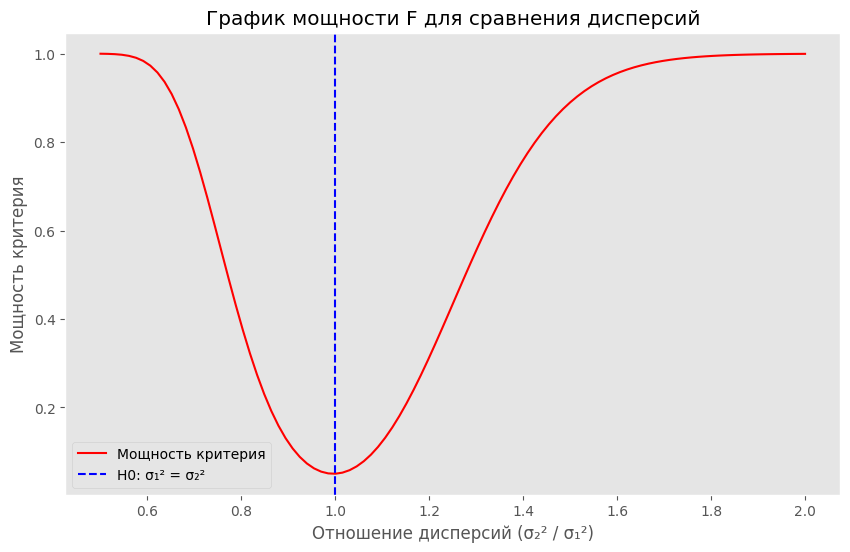

In [45]:
# График мощности
lambda_vals = np.linspace(0.5, 2, 100)
power = 1 - f.cdf(quantile_97_5, n1, n2, scale=lambda_vals) + f.cdf(quantile_2_5, n1, n2, scale=lambda_vals)

plt.figure(figsize=(10, 6))
plt.plot(lambda_vals, power, label="Мощность критерия", color="red")
plt.axvline(x=1, color="blue", linestyle="--", label="H0: σ₁² = σ₂²")
plt.xlabel("Отношение дисперсий (σ₂² / σ₁²)")
plt.ylabel("Мощность критерия")
plt.title("График мощности F для сравнения дисперсий")
plt.legend()
plt.grid()
plt.show()